## Dhruvin Bhanderi

## Task - 2 Iris Data Clustering

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 

## Loading Data

In [42]:
set = datasets.load_iris()
df = pd.DataFrame(set.data, columns= set.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
x = df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans

wcss = [] #Within Cluster sum of squeres

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.47223015873018,
 39.03998724608725,
 34.299712121212146,
 30.063110617452732,
 28.27172172856384,
 26.094324740540422]

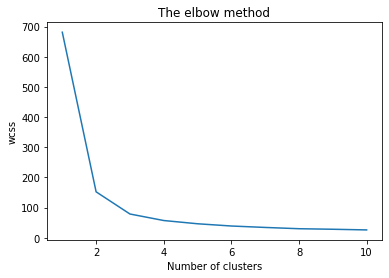

In [48]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

## Applying kmeans to the dataset / Creating the kmeans classifier

In [51]:
kmeans = KMeans(n_clusters=3 , init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(x)

## Visulizing the clusters - On the first two columns

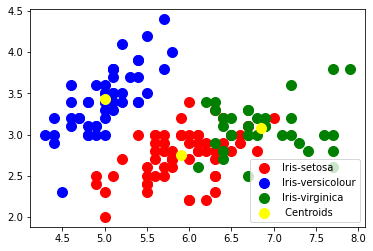

In [56]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c = 'green', label = 'Iris-virginica')

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c='yellow' , label = ' Centroids')

plt.legend()